<a href="https://colab.research.google.com/github/PHAMDANGKIEUOANH/data-analytics/blob/main/Modcloth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import json

with open('/content/drive/MyDrive/Colab/modcloth_final_data.json', 'r') as f:
    for line in f:
        data = json.loads(line)
        # do something with the data object

In [ ]:
data

{'item_id': '807722',
 'size': 4,
 'quality': 4,
 'cup size': 'd',
 'hips': '39.0',
 'bra size': '32',
 'review_summary': "I love this piece. I'm re",
 'category': 'outerwear',
 'length': 'just right',
 'height': '6ft',
 'user_name': 'maireadsteadman',
 'review_text': "I love this piece. I'm really happy with it!",
 'fit': 'fit',
 'user_id': '78305'}

In [ ]:
modcloth_df = pd.read_json('/content/drive/MyDrive/Colab/modcloth_final_data.json', lines=True) 

In [ ]:
modcloth_df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [ ]:
modcloth_df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [ ]:
modcloth_df.info()
# ta thay trong 18 cot chi co 6 cot co du lieu day du vi vậy ta can tính mising data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [ ]:
missing_data = pd.DataFrame({'total_missing': modcloth_df.isnull().sum(), 'perc_missing': (modcloth_df.isnull().sum()/82790)*100})
# Ở đây total_missing là tổng số giá trị bị NaN hoăc Null nhờ câu lệnh isNull
# perc_missing là tỉ lệ phần trăm dư liệu bị thiếu với công thức là tổng dữ liệu bị thiếu chia cho tổng tất cả 
# dư liệu ở đây là 82790 và * 100 để tính phần trăm

In [ ]:
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup size,6255,7.555260
hips,26726,32.281677
bra size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [ ]:
# Mô tả thống kê của các biến số
modcloth_df.describe()

,item_id,waist,size,quality,hips,bra size,user_id,shoe size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


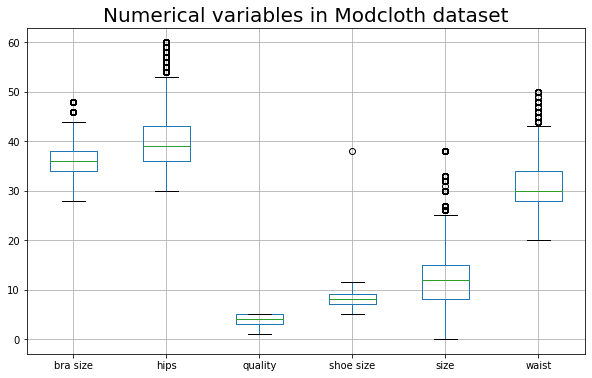

In [ ]:
# Boxplot of numerical variables
num_cols = ['bra size', 'hips', 'quality', 'shoe size', 'size', 'waist'] #  trong danh sách "num_cols" bao gồm: bra size, hips, quality, shoe size, size, và waist.
plt.figure(figsize=(10,6))
modcloth_df[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()
# Đoạn code trên được sử dụng để tạo ra một biểu đồ hộp (boxplot) để trực quan hóa phân bố của các biến số định lượng (numerical variables) trong tập dữ liệu "modcloth_df".
# Để tạo biểu đồ hộp, đoạn code sử dụng phương thức "boxplot()" của pandas trên tập dữ liệu "modcloth_df[num_cols]" 
# để vẽ các hộp đại diện cho khoảng giá trị từ tứ phân vị thứ nhất đến thứ ba (25%, 50%, 75%), đường màu đỏ cho giá trị trung vị (median), và các điểm ngoại lai (outliers).
# figure(figsize=(18,9))" để đặt kích thước của biểu đồ
# Cuối cùng, đoạn code sử dụng phương thức "show()" của matplotlib để hiển thị biểu đồ hộp.

In [ ]:
# Shoe size o day qua khac biet voi cac gia tri khac ta nen xử lí nó
modcloth_df[modcloth_df['shoe size'] == 38]

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [ ]:
#  We'll enter this as null value for now.
modcloth_df.at[37313,'shoe size'] = None

In [ ]:
# bra_size:
modcloth_df.sort_values(by=['bra size'], ascending=False).head(10)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...
57273,645822,NaN,32,5.0,ddd/f,55.0,48.0,tops,NaN,5ft,Lillie,just right,fit,732268,NaN,NaN,I wear this almost every,I wear this almost every single day! Yay! Some...
14033,171125,NaN,38,3.0,c,NaN,48.0,dresses,NaN,5ft 8in,dillsyrpickle,just right,small,416697,NaN,NaN,So I really wanted to lov,So I really wanted to love this dress. I'm a ...
28845,401773,NaN,26,3.0,b,55.0,48.0,new,50,5ft 6in,Michelle,just right,fit,340392,9.5,wide,These cardigans are a gre,These cardigans are a great way to achieve tha...
22637,353933,NaN,38,5.0,b,NaN,48.0,dresses,NaN,5ft 2in,Meghan,slightly long,fit,175295,NaN,NaN,No negatives to this dres,"No negatives to this dress, it's absolutely go..."
38063,417269,NaN,38,4.0,c,NaN,48.0,new,NaN,5ft 6in,Bea,very long,fit,799178,NaN,NaN,"I love the fabric, I love","I love the fabric, I love long tops, this one ..."


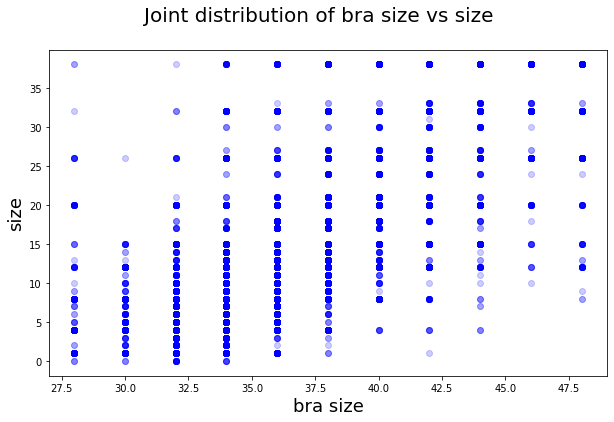

In [ ]:
# Joint Distribution of bra_size vs size
plt.figure(figsize=(10,6))
plt.xlabel("bra size", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of bra size vs size", fontsize= 20)
plt.plot(modcloth_df['bra size'], modcloth_df['size'], 'bo', alpha=0.2)
plt.show()

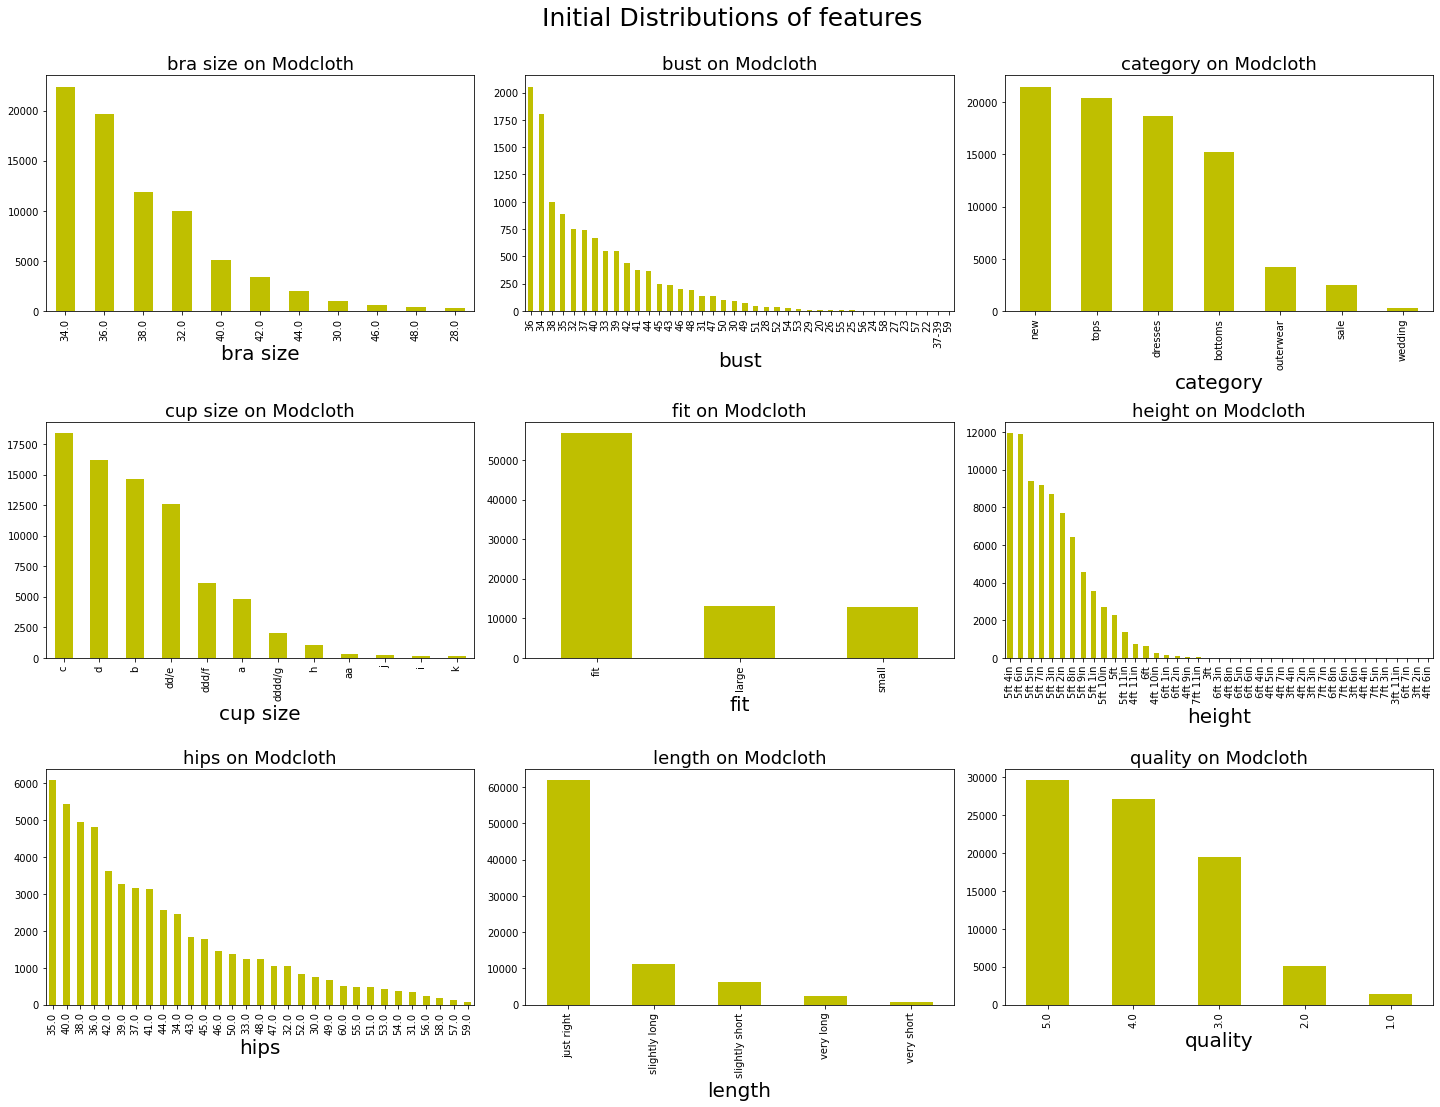

In [ ]:
# Now, we 'll head to preprocessing the dataset for suitable visualizations.
# Data Cleaning & Pre-processing
# Initial Distribution of features

def plot_dist(col, ax):
    modcloth_df[col][modcloth_df[col].notnull()].value_counts().plot(kind = 'bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (20,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra size','bust', 'category', 'cup size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

In [ ]:
# Step-by-step features processing:

modcloth_df['bra size'] = modcloth_df['bra size'].fillna('Unknown')
modcloth_df['bra size'] = modcloth_df['bra size'] .astype('category').cat.as_ordered()
modcloth_df.at[37313,'bust'] = '38'
modcloth_df.bust = modcloth_df.bust.fillna(0).astype(int)
modcloth_df.category = modcloth_df.category.astype('category')

In [ ]:
modcloth_df[modcloth_df['cup size'].isnull()].sample(20)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
31848,407134,NaN,12,3.0,NaN,NaN,Unknown,new,0,5ft 4in,emma,just right,small,995652,NaN,NaN,I'm hoping that I can str,I'm hoping that I can stretch the large a litt...
63302,665779,NaN,8,3.0,NaN,NaN,Unknown,bottoms,0,5ft 9in,kala.jewett,just right,fit,276316,NaN,NaN,Just wasn't in love with,Just wasn't in love with it.
64896,668696,NaN,4,5.0,NaN,NaN,Unknown,bottoms,0,5ft 5in,jessicae718,just right,fit,973388,NaN,NaN,This skirt is just perfec,This skirt is just perfect! I wear a size 4 or...
24721,391519,NaN,4,4.0,NaN,NaN,Unknown,dresses,0,5ft 5in,km.wong430,just right,fit,844133,NaN,NaN,Excellent fit! The qualit,Excellent fit! The quality was great and the s...
71853,747556,NaN,38,4.0,NaN,NaN,Unknown,bottoms,0,5ft 6in,LadyStardust,just right,fit,289176,NaN,NaN,I love this skirt !,I had been eyeing this skirt since I first saw...
66963,697835,NaN,6,5.0,NaN,NaN,Unknown,bottoms,0,5ft 1in,Fina,just right,fit,481659,NaN,NaN,I love it so much,I love it so much
37124,416738,NaN,12,4.0,NaN,NaN,Unknown,new,0,5ft 4in,jencbagley,just right,fit,363319,NaN,NaN,This is a great sweater I,This is a great sweater I love it so much I bo...
77640,775870,NaN,4,4.0,NaN,NaN,32.0,new,0,5ft 5in,Hong Kong Chrissy,just right,fit,652996,8.5,average,I have a similar blazer t,I have a similar blazer that I got years ago a...
73125,753429,NaN,6,4.0,NaN,NaN,Unknown,bottoms,0,5ft 6in,chelsaleahurst,just right,fit,630637,NaN,NaN,"Not transparent at all, a","Not transparent at all, and not uncomfortably ..."
66888,697835,NaN,20,5.0,NaN,45.0,Unknown,bottoms,0,5ft 4in,Shannon,slightly long,large,833148,NaN,NaN,I love these leggings but,I love these leggings but I have to return for...


In [ ]:
modcloth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   item_id         82790 non-null  int64   
 1   waist           2882 non-null   float64 
 2   size            82790 non-null  int64   
 3   quality         82722 non-null  float64 
 4   cup size        76535 non-null  object  
 5   hips            56064 non-null  float64 
 6   bra size        82790 non-null  category
 7   category        82790 non-null  category
 8   bust            82790 non-null  int64   
 9   height          81683 non-null  object  
 10  user_name       82790 non-null  object  
 11  length          82755 non-null  object  
 12  fit             82790 non-null  object  
 13  user_id         82790 non-null  int64   
 14  shoe size       27914 non-null  float64 
 15  shoe width      18607 non-null  object  
 16  review_summary  76065 non-null  object  
 17  review_text 

In [ ]:
# fit- Change the dtype to category for this column. We can see that a vast majority of customers gave a good 'fit' feedback for the items on Modcloth!
modcloth_df['cup size'].fillna('Unknown', inplace=True)
modcloth_df['cup size'] = modcloth_df['cup size'].astype('category').cat.as_ordered()

modcloth_df.fit = modcloth_df.fit.astype('category')

In [ ]:
# height- We need to parse the height column as currently it is a string object, of the form - Xft
# It will make sense to convert height to cms. We also take a look at the rows where the height data is missing.
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
modcloth_df.height = modcloth_df.height.apply(get_cms)

In [ ]:
modcloth_df[modcloth_df.height.isnull()].head(20)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36.0,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN
73,124124,NaN,20,4.0,c,NaN,38.0,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,NaN,NaN
131,124124,NaN,12,3.0,c,NaN,36.0,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,NaN,NaN
213,124124,NaN,20,4.0,d,NaN,40.0,new,0,NaN,rhea_heather,just right,fit,121007,NaN,NaN,NaN,NaN
382,125442,NaN,5,5.0,b,NaN,34.0,new,0,NaN,kelsi.flatland,just right,large,5752,NaN,NaN,NaN,NaN
423,125442,NaN,7,5.0,c,NaN,34.0,new,0,NaN,Naomi,just right,fit,563612,NaN,NaN,NaN,NaN
456,125442,NaN,7,5.0,b,NaN,38.0,new,0,NaN,shirawzn,just right,fit,968605,NaN,NaN,NaN,NaN
475,125442,NaN,7,5.0,dd/e,36.0,30.0,new,0,NaN,Ingrid,just right,small,940714,NaN,NaN,NaN,NaN


In [ ]:
# Feature Engineering
# Creating a new feature of first_time_user
print(modcloth_df[((modcloth_df['bra size'] != 'Unknown') | (modcloth_df['cup size'] != 'Unknown')) & (modcloth_df.height.isnull()) & (modcloth_df.hips.isnull()) &
     (modcloth_df['shoe size'].isnull()) & (modcloth_df['shoe width'].isnull()) & (modcloth_df.waist.isnull())].head(3))
print(modcloth_df[(modcloth_df['bra size'] == 'Unknown') & (modcloth_df['cup size'] == 'Unknown') & (modcloth_df.height.isnull()) & (modcloth_df.hips.isnull()) &
     ((modcloth_df['shoe size'].notnull()) | (modcloth_df['shoe width'].notnull())) & (modcloth_df.waist.isnull())].head(3))
print(modcloth_df[(modcloth_df['bra size'] == 'Unknown') & (modcloth_df['cup size'] == 'Unknown') & (modcloth_df.height.isnull()) & ((modcloth_df.hips.notnull()) | (modcloth_df.waist.notnull())) &
     (modcloth_df['shoe size'].isnull()) & (modcloth_df['shoe width'].isnull())].head(3))

    item_id  waist  size  quality cup size  hips bra size category  bust  \
3    123373    NaN    21      5.0     dd/e   NaN  Unknown      new     0   
17   123373    NaN    15      4.0   dddd/g   NaN     36.0      new     0   
43   123373    NaN    15      5.0     dd/e   NaN     36.0      new     0   

    height     user_name      length    fit  user_id  shoe size shoe width  \
3      NaN  alexmeyer626  just right    fit   875643        NaN        NaN   
17     NaN         Megan  just right  large   128353        NaN        NaN   
43     NaN       sdhewey  just right    fit   670919        NaN        NaN   

   review_summary review_text  
3             NaN         NaN  
17            NaN         NaN  
43            NaN         NaN  
     item_id  waist  size  quality cup size  hips bra size category  bust  \
553   125442    NaN     7      5.0  Unknown   NaN  Unknown      new     0   
591   125442    NaN     7      3.0  Unknown   NaN  Unknown      new     0   
665   125442    NaN    

In [ ]:
# Now we add a new column to the original data- first_time_user
lingerie_cond = (((modcloth_df['bra size'] != 'Unknown') | (modcloth_df['cup size'] != 'Unknown')) & (modcloth_df.height.isnull()) & (modcloth_df.hips.isnull()) &
     (modcloth_df['shoe size'].isnull()) & (modcloth_df['shoe width'].isnull()) & (modcloth_df.waist.isnull()))
shoe_cond = ((modcloth_df['bra size'] == 'Unknown') & (modcloth_df['cup size'] == 'Unknown') & (modcloth_df.height.isnull()) & (modcloth_df.hips.isnull()) &
     ((modcloth_df['shoe size'].notnull()) | (modcloth_df['shoe width'].notnull())) & (modcloth_df.waist.isnull()))
dress_cond = ((modcloth_df['bra size'] == 'Unknown') & (modcloth_df['cup size'] == 'Unknown') & (modcloth_df.height.isnull()) & ((modcloth_df.hips.notnull()) | (modcloth_df.waist.notnull())) &
     (modcloth_df['shoe size'].isnull()) & (modcloth_df['shoe width'].isnull()))
#print(len(modcloth_df[lingerie_cond]))   # To check if these items add up in the final column we are adding.
#print(len(modcloth_df[shoe_cond]))
#print(len(modcloth_df[dress_cond]))
modcloth_df['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
print("Column added!")
print("Total transactions by first time users who bought bra, shoes, or a dress: " + str(sum(modcloth_df.first_time_user)))
print("Total first time users: " + str(len(modcloth_df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))

Column added!
Total transactions by first time users who bought bra, shoes, or a dress: 903
Total first time users: 565


In [ ]:
# Handling hips column
modcloth_df.hips = modcloth_df.hips.fillna(-1.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
modcloth_df.hips = pd.cut(modcloth_df.hips, bins, labels=labels)

# Handling length column
missing_rows = modcloth_df[modcloth_df.length.isnull()].index
modcloth_df.drop(missing_rows, axis = 0, inplace=True)

# Handling quality
missing_rows = modcloth_df[modcloth_df.quality.isnull()].index
modcloth_df.drop(missing_rows, axis = 0, inplace=True)
modcloth_df.quality = modcloth_df.quality.astype('category').cat.as_ordered()

In [ ]:
from pandas.api.types import CategoricalDtype

shoe_widths_type = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)

modcloth_df.review_summary = modcloth_df.review_summary.fillna('Unknown')
modcloth_df.review_text = modcloth_df.review_text.fillna('Unkown')
modcloth_df['shoe size'] = modcloth_df['shoe size'].fillna('Unknown')
modcloth_df['shoe size'] = modcloth_df['shoe size'].astype('category').cat.as_ordered()
modcloth_df['shoe width'] = modcloth_df['shoe width'].fillna('Unknown')
modcloth_df['shoe width'] = modcloth_df['shoe width'].astype(shoe_widths_type)
modcloth_df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)
missing_rows = modcloth_df[modcloth_df.height.isnull()].index
modcloth_df.drop(missing_rows, axis = 0, inplace=True)

In [ ]:
modcloth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81594 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          81594 non-null  int64   
 1   size             81594 non-null  int64   
 2   quality          81594 non-null  category
 3   cup size         81594 non-null  category
 4   hips             81594 non-null  category
 5   bra size         81594 non-null  category
 6   category         81594 non-null  category
 7   height           81594 non-null  float64 
 8   length           81594 non-null  object  
 9   fit              81594 non-null  category
 10  user_id          81594 non-null  int64   
 11  shoe size        81594 non-null  category
 12  shoe width       81594 non-null  category
 13  review_summary   81594 non-null  object  
 14  review_text      81594 non-null  object  
 15  first_time_user  81594 non-null  bool    
dtypes: bool(1), category(8), float64(1), int

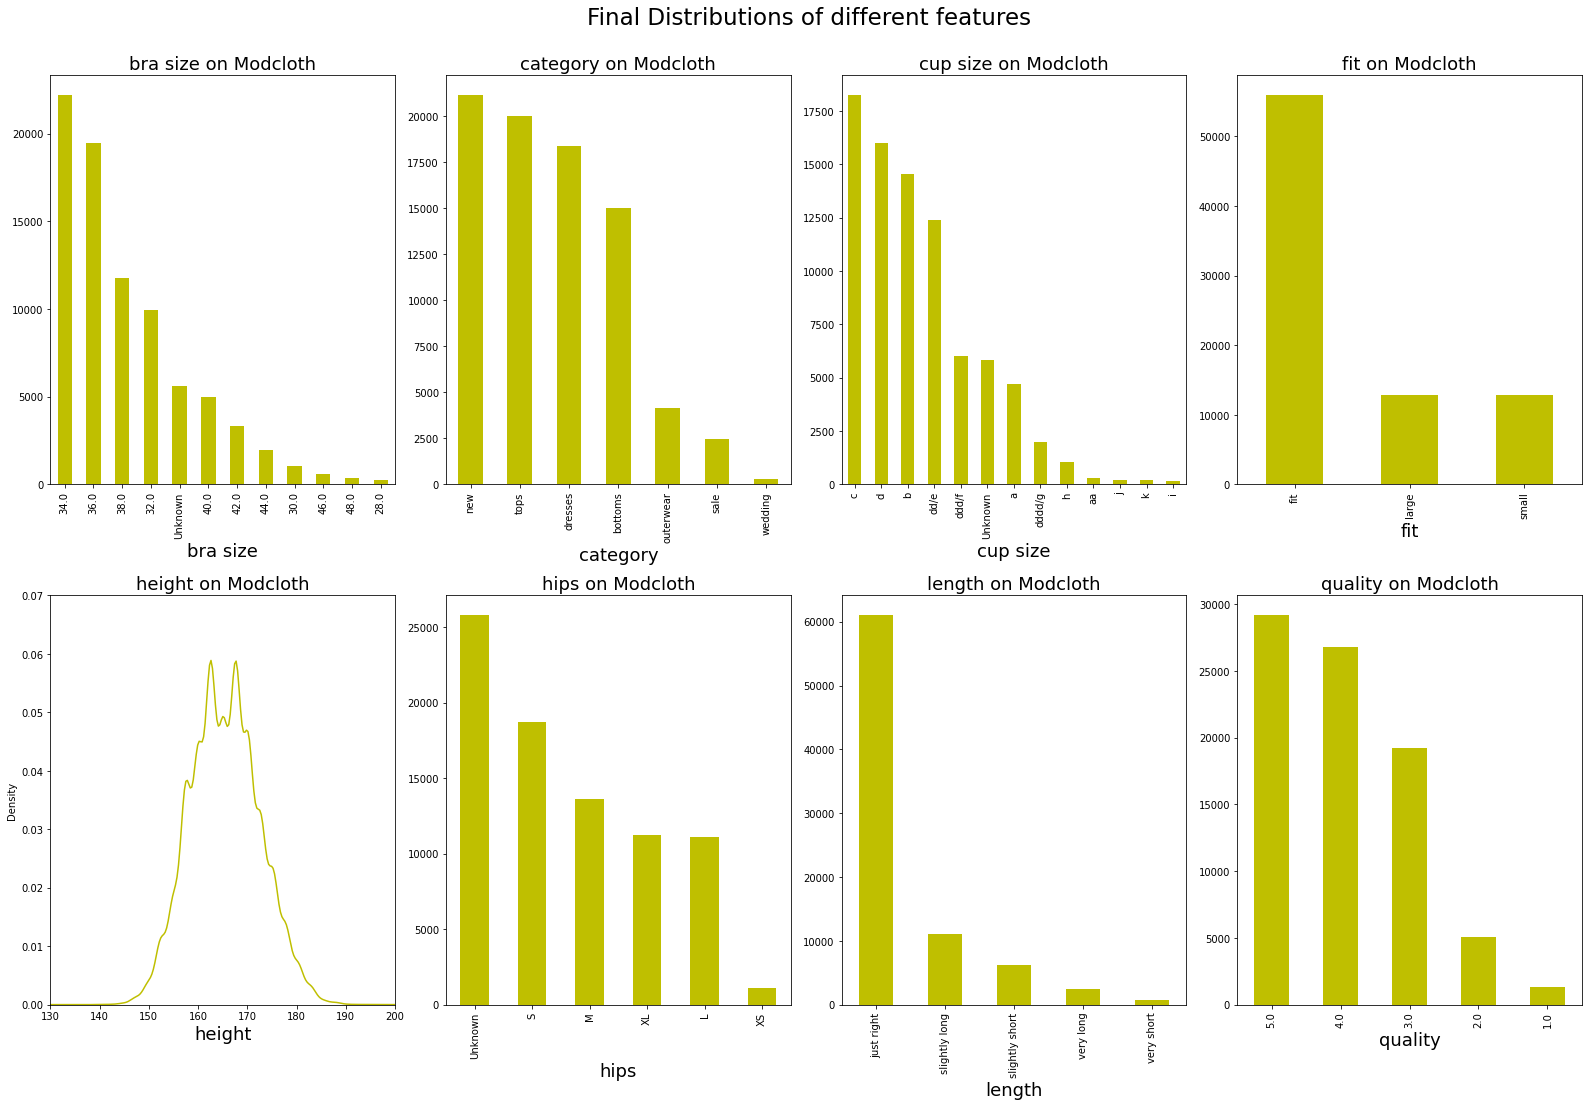

In [ ]:
# We can see that now there are no more missing values! We can move onto visualizing and gaining more insight about the data.
# EDA via visualizations
# 1. Distribution of different features over Modcloth dataset

def plot_dist(col, ax):
    if col != 'height':
        modcloth_df[col].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    else:
        modcloth_df[col].plot(kind='density', ax=ax, bw_method = 0.15, color='y')
        ax.set_xlim(130,200)
        ax.set_ylim(0, 0.07)
    ax.set_xlabel('{}'.format(col), fontsize=18)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(2,4, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = ['bra size','category', 'cup size', 'fit', 'height', 'hips', 'length', 'quality']
k = 0
for i in range(2):
    for j in range(4):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Final Distributions of different features", fontsize= 23)

In [ ]:
# Categories vs. Fit/Length/Quality

def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [ ]:
modcloth_df.category.value_counts()

new          21177
tops         20048
dresses      18402
bottoms      15047
outerwear     4180
sale          2469
wedding        271
Name: category, dtype: int64

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


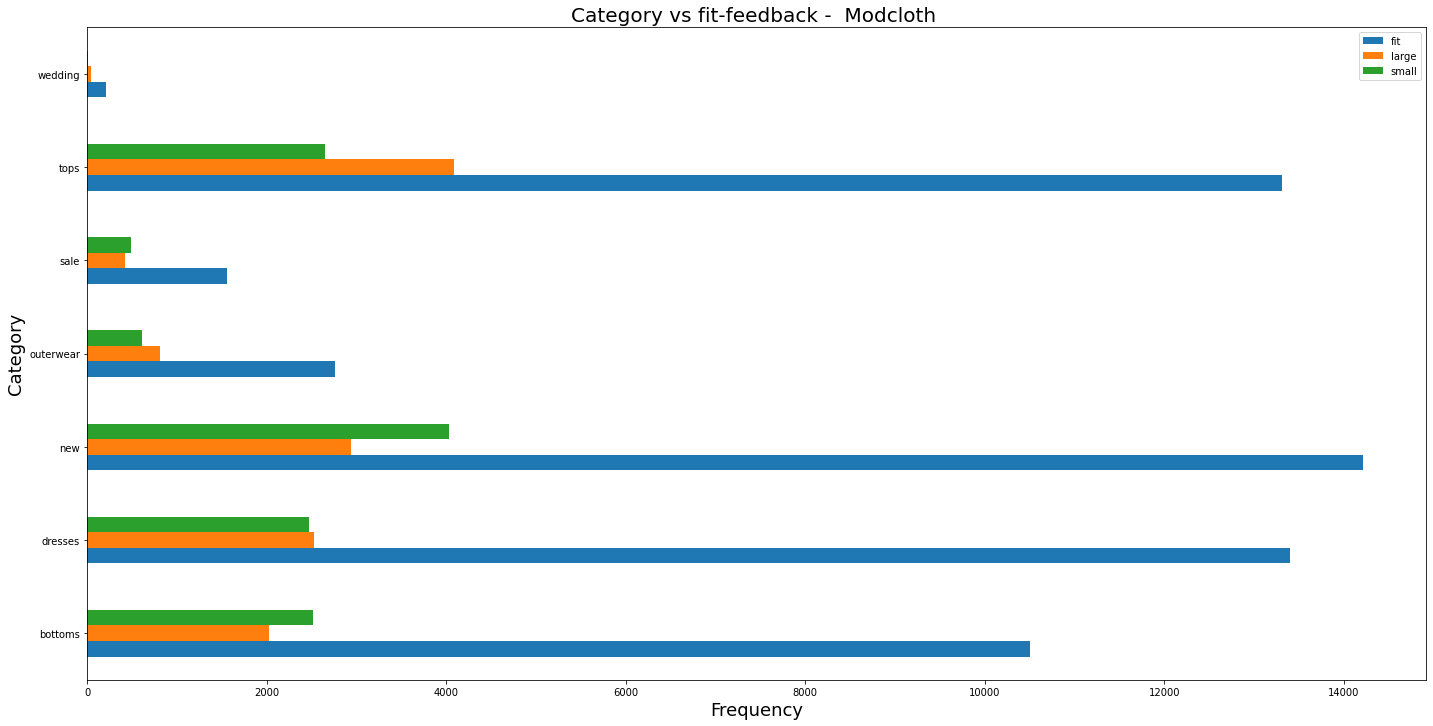

In [ ]:
# Category vs. Fit

g_by_category = modcloth_df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit');

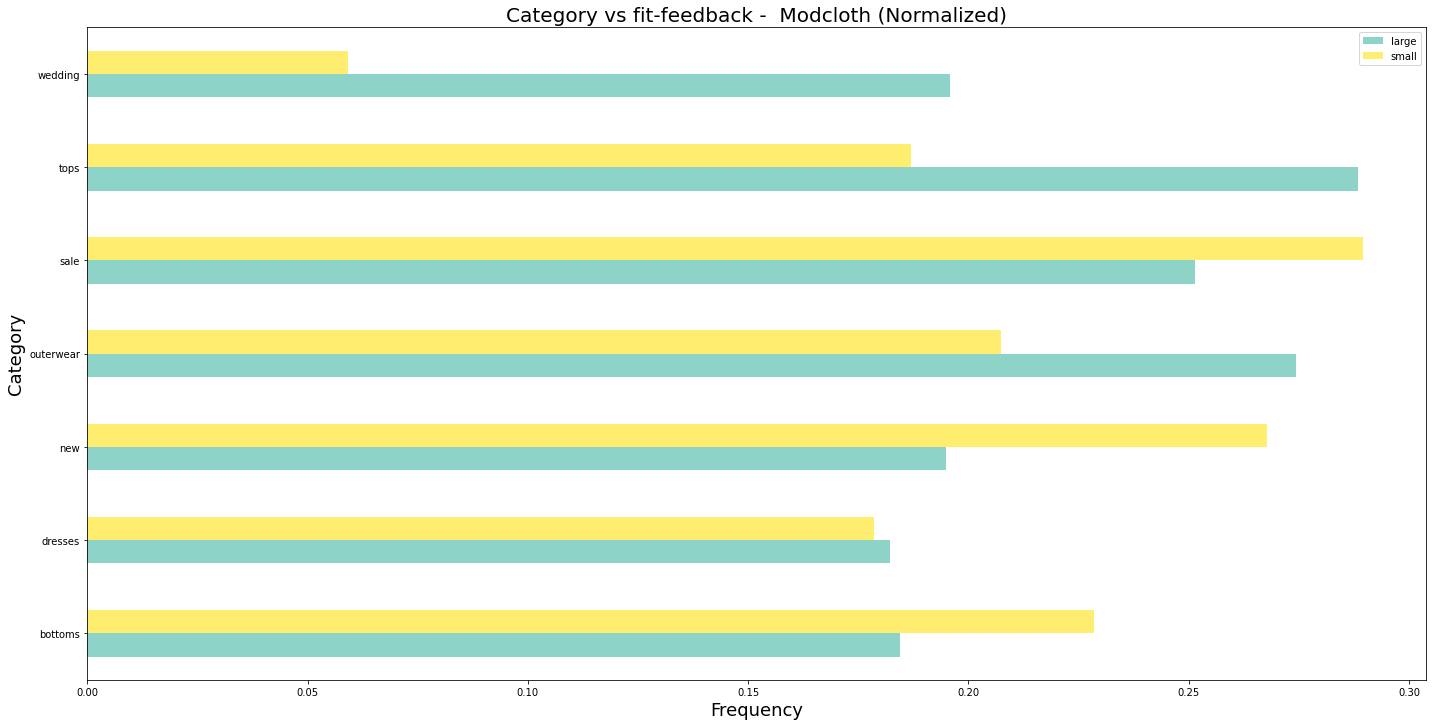

In [ ]:
plot_barh(cat_fit_norm, 'fit', norm=1, cmap='Set3')

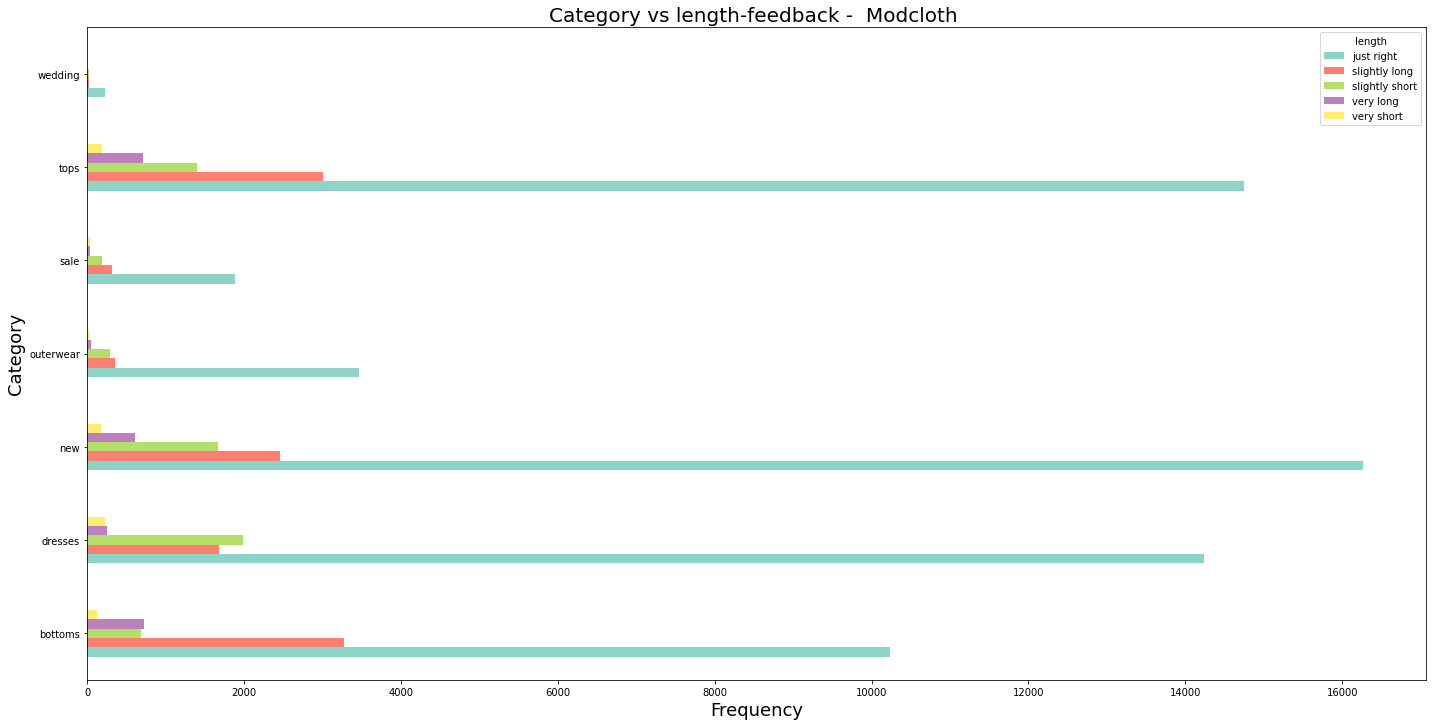

In [ ]:
# Category vs Length

cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Set3')

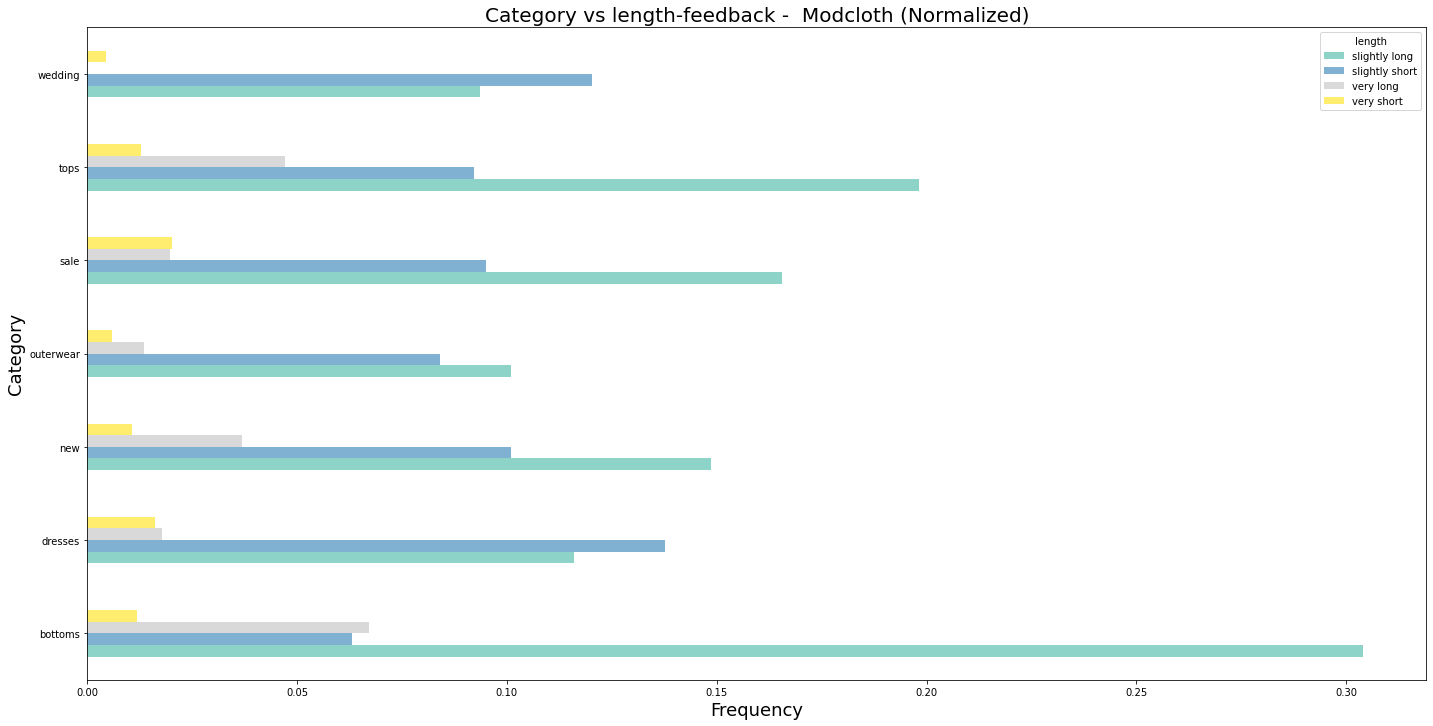

In [ ]:
cat_len_norm = norm_counts(cat_len)
cat_len_norm.drop(['just right'], axis = 1, inplace=True)
plot_barh(cat_len_norm, 'length', cmap='Set3', norm=1)

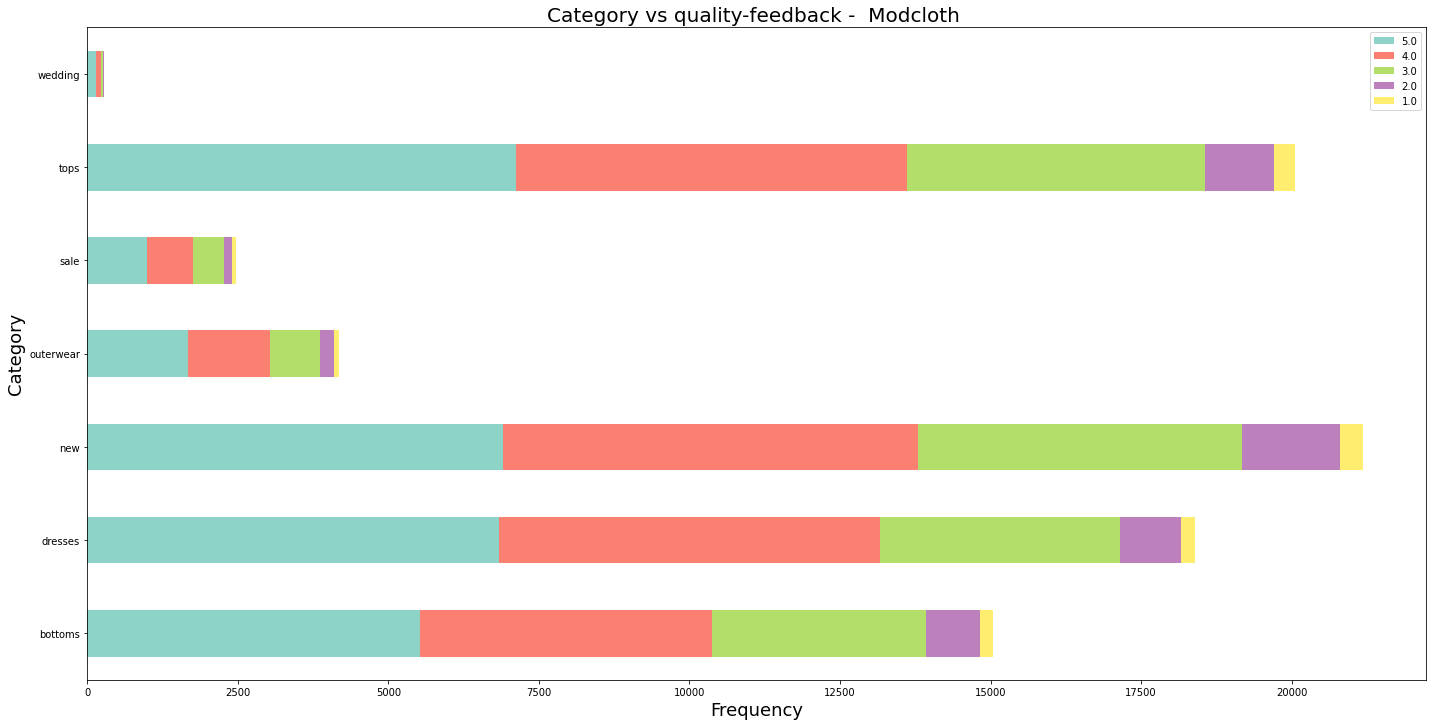

In [ ]:
# Category vs Quality

cat_quality = g_by_category['quality'].value_counts()
cat_quality = cat_quality.unstack()
plot_barh(cat_quality, 'quality', 'Set3', stacked=1)

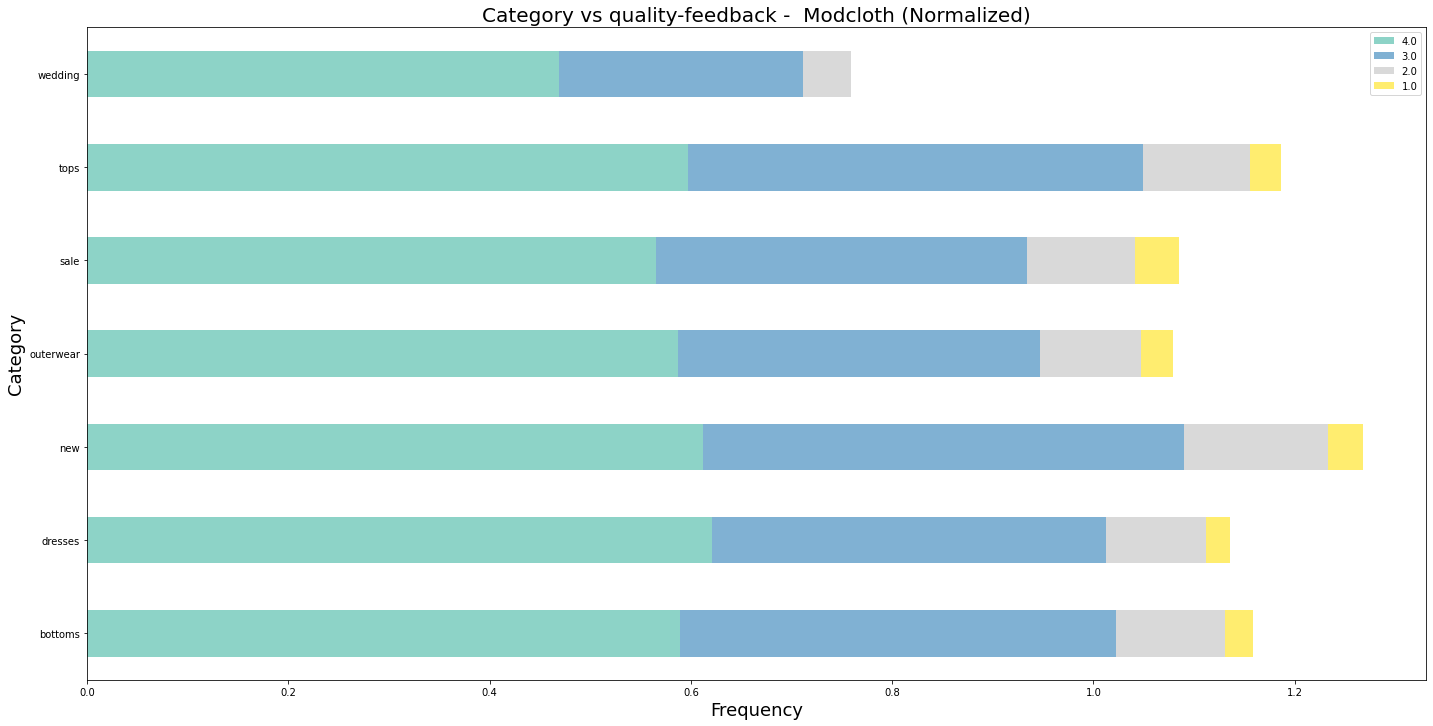

In [ ]:
cat_quality_norm = norm_counts(cat_quality)
cat_quality_norm.drop([5.0], axis = 1, inplace=True)
plot_barh(cat_quality_norm, 'quality', 'Set3', stacked=1, norm=1)

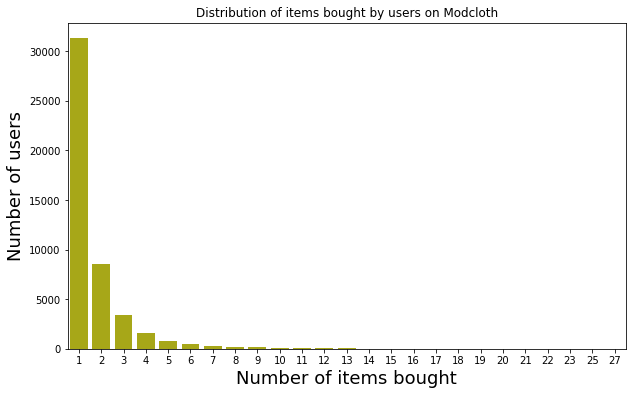

In [ ]:
# 2. Total Number of Users vs Total Number of items bought
# Users who bought so many items
items_bought = []
total_users = []
for i in range(min(modcloth_df.user_id.value_counts()), max(modcloth_df.user_id.value_counts())+1):
    all_users = sum(modcloth_df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(10,6)

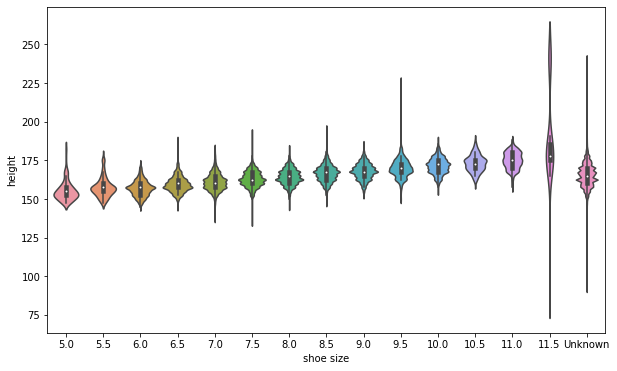

In [ ]:
# Phần lớn người dùng (~40%) chỉ mua 1 mặt hàng từ Modcloth trong thời gian dữ liệu này được thu thập. 
#Mặc dù chúng tôi chỉ tìm thấy 903 trong số đó là người dùng lần đầu (không có dữ liệu trước đó về những khách hàng này). 
# Điều này giải thích và khẳng định lại tuyên bố của người quản lý tập dữ liệu về độ thưa thớt của dữ liệu.
#Hầu hết người dùng đã mua 1, 2 hoặc 3 sản phẩm từ Modcloth trong số ~80.000 giao dịch trong bộ dữ liệu này.

#Height vs shoe_size - Modcloth customers
fig = plt.gcf()
fig.set_size_inches(10,6)
__ = sns.violinplot(x='shoe size', y='height',data=modcloth_df, size = 20)

In [ ]:
modcloth_df.head(20)

,item_id,size,quality,cup size,hips,bra size,category,height,length,fit,user_id,shoe size,shoe width,review_summary,review_text,first_time_user
0,123373,7,5.0,d,M,34.0,new,167.64,just right,small,991571,Unknown,Unknown,Unknown,Unkown,False
1,123373,13,3.0,b,XS,36.0,new,157.48,just right,small,587883,Unknown,Unknown,Unknown,Unkown,False
2,123373,7,2.0,b,Unknown,32.0,new,170.18,slightly long,small,395665,9.0,Unknown,Unknown,Unkown,False
4,123373,18,5.0,b,Unknown,36.0,new,157.48,slightly long,small,944840,Unknown,Unknown,Unknown,Unkown,False
5,123373,11,5.0,c,L,36.0,new,162.56,just right,small,162012,Unknown,Unknown,Unknown,Unkown,False
6,123373,5,1.0,b,Unknown,32.0,new,160.02,just right,large,114843,Unknown,Unknown,Unknown,Unkown,False
7,123373,11,5.0,d,L,38.0,new,165.10,just right,small,58869,8.5,Unknown,Unknown,Unkown,False
8,123373,30,4.0,d,XL,42.0,new,177.80,just right,small,279568,11.0,wide,Unknown,Unkown,False
9,123373,13,5.0,dd/e,L,36.0,new,167.64,just right,fit,950172,9.0,Unknown,Unknown,Unkown,False
10,123373,24,4.0,d,XL,40.0,new,167.64,just right,small,205796,Unknown,Unknown,Unknown,Unkown,False


In [ ]:
import json
import pandas as pd

# giả sử df là DataFrame của bạn


# chuyển đổi DataFrame sang danh sách các đối tượng Python
data = modcloth_df.to_dict(orient='records')

# ghi danh sách vào tệp JSON
with open('data.json', 'w') as outfile:
    json.dump(data, outfile)

In [ ]:
modcloth_df.head(20)

,item_id,size,quality,cup size,hips,bra size,category,height,length,fit,user_id,shoe size,shoe width,review_summary,review_text,first_time_user
0,123373,7,5.0,d,M,34.0,new,167.64,just right,small,991571,Unknown,Unknown,Unknown,Unkown,False
1,123373,13,3.0,b,XS,36.0,new,157.48,just right,small,587883,Unknown,Unknown,Unknown,Unkown,False
2,123373,7,2.0,b,Unknown,32.0,new,170.18,slightly long,small,395665,9.0,Unknown,Unknown,Unkown,False
4,123373,18,5.0,b,Unknown,36.0,new,157.48,slightly long,small,944840,Unknown,Unknown,Unknown,Unkown,False
5,123373,11,5.0,c,L,36.0,new,162.56,just right,small,162012,Unknown,Unknown,Unknown,Unkown,False
6,123373,5,1.0,b,Unknown,32.0,new,160.02,just right,large,114843,Unknown,Unknown,Unknown,Unkown,False
7,123373,11,5.0,d,L,38.0,new,165.10,just right,small,58869,8.5,Unknown,Unknown,Unkown,False
8,123373,30,4.0,d,XL,42.0,new,177.80,just right,small,279568,11.0,wide,Unknown,Unkown,False
9,123373,13,5.0,dd/e,L,36.0,new,167.64,just right,fit,950172,9.0,Unknown,Unknown,Unkown,False
10,123373,24,4.0,d,XL,40.0,new,167.64,just right,small,205796,Unknown,Unknown,Unknown,Unkown,False


In [ ]:
pd.read_json('/content/data.json')

,item_id,size,quality,cup size,hips,bra size,category,height,length,fit,user_id,shoe size,shoe width,review_summary,review_text,first_time_user
0,123373,7,5,d,M,34.0,new,167.64,just right,small,991571,Unknown,Unknown,Unknown,Unkown,False
1,123373,13,3,b,XS,36.0,new,157.48,just right,small,587883,Unknown,Unknown,Unknown,Unkown,False
2,123373,7,2,b,Unknown,32.0,new,170.18,slightly long,small,395665,9.0,Unknown,Unknown,Unkown,False
3,123373,18,5,b,Unknown,36.0,new,157.48,slightly long,small,944840,Unknown,Unknown,Unknown,Unkown,False
4,123373,11,5,c,L,36.0,new,162.56,just right,small,162012,Unknown,Unknown,Unknown,Unkown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81589,807722,8,4,b,Unknown,36.0,outerwear,172.72,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!,False
81590,807722,12,5,ddd/f,Unknown,34.0,outerwear,165.10,slightly long,small,197040,Unknown,Unknown,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,False
81591,807722,12,5,dddd/g,S,32.0,outerwear,162.56,just right,fit,102493,Unknown,Unknown,I love this blazer. It is,I love this blazer. It is a great office piece...,False
81592,807722,12,4,Unknown,Unknown,Unknown,outerwear,160.02,just right,fit,756491,Unknown,Unknown,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,False


In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp JSON vào một danh sách các từ điển
with open('data.json') as f:
    data = json.load(f)

# Tạo DataFrame từ danh sách các từ điển
df = pd.DataFrame(data)

# Ghi DataFrame vào tệp CSV
df.to_csv('data.csv', index=False)
